In [1]:
"""
Clinical Category Cross-Tabulations

This notebook analyzes how the three metabolic risk factors co-occur:
1. Creates clinical risk categories for each variable
2. Performs 3-way cross-tabulation analysis
3. Identifies phenotype patterns (pure vs combined)
4. Tests statistical independence
5. Visualizes co-occurrence patterns

"""

import sys
sys.path.append('../../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import chi2_contingency
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Pastel colors
pastel_colors = ['#FFB6C1', '#B0E0E6', '#DDA0DD', '#F0E68C', '#98FB98', 
                 '#FFE4B5', '#E6E6FA', '#FFC0CB']
sns.set_palette(pastel_colors)

print("CLINICAL CATEGORY CROSS-TABULATIONS - PHASE 2, STEP 3")
print("Analyzing co-occurrence patterns of metabolic risk factors\n")

CLINICAL CATEGORY CROSS-TABULATIONS - PHASE 2, STEP 3
Analyzing co-occurrence patterns of metabolic risk factors



In [2]:
# Load data with MetS variables
df = pd.read_csv("../../data/processed/nhanes_metabolic_with_mets.csv")

print(f"Loaded data: {df.shape[0]:,} participants × {df.shape[1]} variables")

# Verify we have the necessary variables
required_vars = ['LBXGLU', 'LBXTLG', 'BMXWAIST', 'mets_glucose', 'mets_triglycerides', 
                 'mets_waist', 'mets_combination', 'RIAGENDR']

print("\nVerifying required variables:")
for var in required_vars:
    if var in df.columns:
        print(f"  ✓ {var}")
    else:
        print(f"  ✗ {var} - MISSING")

print("\nData loaded successfully")

Loaded data: 3,047 participants × 50 variables

Verifying required variables:
  ✓ LBXGLU
  ✓ LBXTLG
  ✓ BMXWAIST
  ✓ mets_glucose
  ✓ mets_triglycerides
  ✓ mets_waist
  ✓ mets_combination
  ✓ RIAGENDR

Data loaded successfully


In [3]:
# Create binary risk categories (already done, but let's verify and label)

# Verify the binary flags exist
print("Binary Risk Categories (ATP III Thresholds):")
print(f"\n1. Elevated Waist Circumference:")
print(f"   Male ≥102 cm, Female ≥88 cm")
print(f"   Elevated: {df['mets_waist'].sum():,} ({df['mets_waist'].mean()*100:.1f}%)")

print(f"\n2. Elevated Triglycerides:")
print(f"   ≥150 mg/dL")
print(f"   Elevated: {df['mets_triglycerides'].sum():,} ({df['mets_triglycerides'].mean()*100:.1f}%)")

print(f"\n3. Impaired Fasting Glucose:")
print(f"   ≥100 mg/dL")
print(f"   Elevated: {df['mets_glucose'].sum():,} ({df['mets_glucose'].mean()*100:.1f}%)")

# Create readable labels for each component
df['waist_status'] = df['mets_waist'].map({0: 'Normal', 1: 'Elevated'})
df['trig_status'] = df['mets_triglycerides'].map({0: 'Normal', 1: 'Elevated'})
df['glucose_status'] = df['mets_glucose'].map({0: 'Normal', 1: 'Elevated'})

print("\n✓ Created readable status labels for all three components")

Binary Risk Categories (ATP III Thresholds):

1. Elevated Waist Circumference:
   Male ≥102 cm, Female ≥88 cm
   Elevated: 1,827 (60.0%)

2. Elevated Triglycerides:
   ≥150 mg/dL
   Elevated: 671 (22.0%)

3. Impaired Fasting Glucose:
   ≥100 mg/dL
   Elevated: 1,677 (55.0%)

✓ Created readable status labels for all three components


In [4]:
# Create 2-way cross-tabulations for each pair

print("TWO-WAY CROSS-TABULATIONS\n")

# 1. Glucose × Triglycerides
print("1. GLUCOSE × TRIGLYCERIDES")
ct_gt = pd.crosstab(df['glucose_status'], df['trig_status'], margins=True)
print(ct_gt)

# Calculate percentages
ct_gt_pct = pd.crosstab(df['glucose_status'], df['trig_status'], normalize='all') * 100
print("\nPercentages:")
print(ct_gt_pct.round(1))

# 2. Glucose × Waist
print("\n\n2. GLUCOSE × WAIST CIRCUMFERENCE")
ct_gw = pd.crosstab(df['glucose_status'], df['waist_status'], margins=True)
print(ct_gw)

ct_gw_pct = pd.crosstab(df['glucose_status'], df['waist_status'], normalize='all') * 100
print("\nPercentages:")
print(ct_gw_pct.round(1))

# 3. Triglycerides × Waist
print("\n\n3. TRIGLYCERIDES × WAIST CIRCUMFERENCE")
ct_tw = pd.crosstab(df['trig_status'], df['waist_status'], margins=True)
print(ct_tw)

ct_tw_pct = pd.crosstab(df['trig_status'], df['waist_status'], normalize='all') * 100
print("\nPercentages:")
print(ct_tw_pct.round(1))

TWO-WAY CROSS-TABULATIONS

1. GLUCOSE × TRIGLYCERIDES
trig_status     Elevated  Normal   All
glucose_status                        
Elevated             485    1192  1677
Normal               186    1184  1370
All                  671    2376  3047

Percentages:
trig_status     Elevated  Normal
glucose_status                  
Elevated            15.9    39.1
Normal               6.1    38.9


2. GLUCOSE × WAIST CIRCUMFERENCE
waist_status    Elevated  Normal   All
glucose_status                        
Elevated            1178     499  1677
Normal               649     721  1370
All                 1827    1220  3047

Percentages:
waist_status    Elevated  Normal
glucose_status                  
Elevated            38.7    16.4
Normal              21.3    23.7


3. TRIGLYCERIDES × WAIST CIRCUMFERENCE
waist_status  Elevated  Normal   All
trig_status                         
Elevated           498     173   671
Normal            1329    1047  2376
All               1827    1220  3047

Pe

In [5]:
# Create 3-way cross-tabulation

print("THREE-WAY CROSS-TABULATION")
print("GLUCOSE × TRIGLYCERIDES × WAIST CIRCUMFERENCE\n")

# Create 3-way table
ct_3way = pd.crosstab([df['glucose_status'], df['trig_status']], 
                       df['waist_status'], 
                       margins=True)
print(ct_3way)

# Calculate percentages
ct_3way_pct = pd.crosstab([df['glucose_status'], df['trig_status']], 
                           df['waist_status'], 
                           normalize='all') * 100
print("\n\nPercentages of Total Sample:")
print(ct_3way_pct.round(2))

# Alternative view: all 8 possible combinations
print("\n\nALL 8 POSSIBLE COMBINATIONS:")
combo_summary = df.groupby(['glucose_status', 'trig_status', 'waist_status']).size().reset_index(name='Count')
combo_summary['Percentage'] = (combo_summary['Count'] / len(df) * 100).round(2)
combo_summary = combo_summary.sort_values('Count', ascending=False)
print(combo_summary.to_string(index=False))

THREE-WAY CROSS-TABULATION
GLUCOSE × TRIGLYCERIDES × WAIST CIRCUMFERENCE

waist_status                Elevated  Normal   All
glucose_status trig_status                        
Elevated       Elevated          381     104   485
               Normal            797     395  1192
Normal         Elevated          117      69   186
               Normal            532     652  1184
All                             1827    1220  3047


Percentages of Total Sample:
waist_status                Elevated  Normal
glucose_status trig_status                  
Elevated       Elevated        12.50    3.41
               Normal          26.16   12.96
Normal         Elevated         3.84    2.26
               Normal          17.46   21.40


ALL 8 POSSIBLE COMBINATIONS:
glucose_status trig_status waist_status  Count  Percentage
      Elevated      Normal     Elevated    797       26.16
        Normal      Normal       Normal    652       21.40
        Normal      Normal     Elevated    532       17.46
 

In [6]:
# Calculate expected frequencies assuming independence

print("EXPECTED vs OBSERVED FREQUENCIES")
print("Testing if risk factors occur independently\n")

total_n = len(df)

# Marginal probabilities
p_glucose = df['mets_glucose'].mean()
p_trig = df['mets_triglycerides'].mean()
p_waist = df['mets_waist'].mean()

print(f"Marginal Probabilities:")
print(f"  P(Glucose elevated) = {p_glucose:.3f}")
print(f"  P(Triglycerides elevated) = {p_trig:.3f}")
print(f"  P(Waist elevated) = {p_waist:.3f}")

# Calculate expected frequencies for each combination
combinations = []
for g in [0, 1]:
    for t in [0, 1]:
        for w in [0, 1]:
            # Observed
            observed = len(df[(df['mets_glucose']==g) & 
                            (df['mets_triglycerides']==t) & 
                            (df['mets_waist']==w)])
            
            # Expected if independent
            p_g = p_glucose if g==1 else (1-p_glucose)
            p_t = p_trig if t==1 else (1-p_trig)
            p_w = p_waist if w==1 else (1-p_waist)
            expected = total_n * p_g * p_t * p_w
            
            # Ratio
            ratio = observed / expected if expected > 0 else np.nan
            
            # Labels
            g_label = 'Elevated' if g==1 else 'Normal'
            t_label = 'Elevated' if t==1 else 'Normal'
            w_label = 'Elevated' if w==1 else 'Normal'
            
            combinations.append({
                'Glucose': g_label,
                'Triglycerides': t_label,
                'Waist': w_label,
                'Observed': observed,
                'Expected': expected,
                'Obs/Exp_Ratio': ratio
            })

exp_obs_df = pd.DataFrame(combinations)
exp_obs_df = exp_obs_df.sort_values('Obs/Exp_Ratio', ascending=False)

print("\n\nOBSERVED vs EXPECTED FREQUENCIES:")
print(exp_obs_df.round(2).to_string(index=False))

print("\n\nINTERPRETATION:")
print("  Ratio > 1.0: Combination occurs MORE than expected (clustering)")
print("  Ratio = 1.0: Combination occurs AS expected (independence)")
print("  Ratio < 1.0: Combination occurs LESS than expected (avoidance)")

EXPECTED vs OBSERVED FREQUENCIES
Testing if risk factors occur independently

Marginal Probabilities:
  P(Glucose elevated) = 0.550
  P(Triglycerides elevated) = 0.220
  P(Waist elevated) = 0.600


OBSERVED vs EXPECTED FREQUENCIES:
 Glucose Triglycerides    Waist  Observed  Expected  Obs/Exp_Ratio
Elevated      Elevated Elevated       381    221.44           1.72
  Normal        Normal   Normal       652    427.74           1.52
Elevated        Normal Elevated       797    784.10           1.02
  Normal        Normal Elevated       532    640.56           0.83
Elevated        Normal   Normal       395    523.59           0.75
Elevated      Elevated   Normal       104    147.87           0.70
  Normal      Elevated Elevated       117    180.90           0.65
  Normal      Elevated   Normal        69    120.80           0.57


INTERPRETATION:
  Ratio > 1.0: Combination occurs MORE than expected (clustering)
  Ratio = 1.0: Combination occurs AS expected (independence)
  Ratio < 1.0: Combi

In [7]:
# Test independence for each pair and 3-way

print("CHI-SQUARE TESTS FOR INDEPENDENCE\n")

def cramers_v(chi2, n, r, c):
    """Calculate Cramér's V effect size"""
    return np.sqrt(chi2 / (n * min(r-1, c-1)))

# Test 1: Glucose × Triglycerides
print("1. GLUCOSE × TRIGLYCERIDES")
ct = pd.crosstab(df['mets_glucose'], df['mets_triglycerides'])
chi2, p_val, dof, expected = chi2_contingency(ct)
cramers = cramers_v(chi2, len(df), 2, 2)
print(f"   Chi-square: {chi2:.3f}")
print(f"   p-value: {p_val:.4e}")
print(f"   Cramér's V: {cramers:.3f}")
if p_val < 0.001:
    print("   *** Highly significant association")
else:
    print("   Not independent" if p_val < 0.05 else "   Independent")

# Test 2: Glucose × Waist
print("\n2. GLUCOSE × WAIST")
ct = pd.crosstab(df['mets_glucose'], df['mets_waist'])
chi2, p_val, dof, expected = chi2_contingency(ct)
cramers = cramers_v(chi2, len(df), 2, 2)
print(f"   Chi-square: {chi2:.3f}")
print(f"   p-value: {p_val:.4e}")
print(f"   Cramér's V: {cramers:.3f}")
if p_val < 0.001:
    print("   *** Highly significant association")
else:
    print("   Not independent" if p_val < 0.05 else "   Independent")

# Test 3: Triglycerides × Waist
print("\n3. TRIGLYCERIDES × WAIST")
ct = pd.crosstab(df['mets_triglycerides'], df['mets_waist'])
chi2, p_val, dof, expected = chi2_contingency(ct)
cramers = cramers_v(chi2, len(df), 2, 2)
print(f"   Chi-square: {chi2:.3f}")
print(f"   p-value: {p_val:.4e}")
print(f"   Cramér's V: {cramers:.3f}")
if p_val < 0.001:
    print("   *** Highly significant association")
else:
    print("   Not independent" if p_val < 0.05 else "   Independent")

# Test 4: 3-way independence
print("\n4. THREE-WAY INDEPENDENCE TEST")
ct_3way_test = pd.crosstab([df['mets_glucose'], df['mets_triglycerides']], 
                            df['mets_waist'])
chi2, p_val, dof, expected = chi2_contingency(ct_3way_test)
print(f"   Chi-square: {chi2:.3f}")
print(f"   p-value: {p_val:.4e}")
print(f"   Degrees of freedom: {dof}")
if p_val < 0.001:
    print("   *** Three factors are NOT independent")
else:
    print("   Three factors are independent" if p_val >= 0.05 else "   Weak association")

CHI-SQUARE TESTS FOR INDEPENDENCE

1. GLUCOSE × TRIGLYCERIDES
   Chi-square: 102.489
   p-value: 4.3387e-24
   Cramér's V: 0.183
   *** Highly significant association

2. GLUCOSE × WAIST
   Chi-square: 163.351
   p-value: 2.0964e-37
   Cramér's V: 0.232
   *** Highly significant association

3. TRIGLYCERIDES × WAIST
   Chi-square: 72.094
   p-value: 2.0521e-17
   Cramér's V: 0.154
   *** Highly significant association

4. THREE-WAY INDEPENDENCE TEST
   Chi-square: 205.563
   p-value: 2.6487e-44
   Degrees of freedom: 3
   *** Three factors are NOT independent


In [8]:
# Identify pure vs combined phenotypes

print("PHENOTYPE PATTERN IDENTIFICATION\n")

# Count each pattern type
patterns = {
    'None': len(df[df['mets_score']==0]),
    'Pure_Waist': len(df[(df['mets_waist']==1) & (df['mets_triglycerides']==0) & (df['mets_glucose']==0)]),
    'Pure_Triglycerides': len(df[(df['mets_waist']==0) & (df['mets_triglycerides']==1) & (df['mets_glucose']==0)]),
    'Pure_Glucose': len(df[(df['mets_waist']==0) & (df['mets_triglycerides']==0) & (df['mets_glucose']==1)]),
    'Combined_2_factors': len(df[df['mets_score']==2]),
    'Combined_All_3': len(df[df['mets_score']==3])
}

print("PHENOTYPE CATEGORIES:")
print(f"\n1. NO RISK FACTORS:")
print(f"   Count: {patterns['None']:,} ({patterns['None']/len(df)*100:.1f}%)")

print(f"\n2. PURE PHENOTYPES (only 1 elevated):")
print(f"   Waist only: {patterns['Pure_Waist']:,} ({patterns['Pure_Waist']/len(df)*100:.1f}%)")
print(f"   Triglycerides only: {patterns['Pure_Triglycerides']:,} ({patterns['Pure_Triglycerides']/len(df)*100:.1f}%)")
print(f"   Glucose only: {patterns['Pure_Glucose']:,} ({patterns['Pure_Glucose']/len(df)*100:.1f}%)")
pure_total = patterns['Pure_Waist'] + patterns['Pure_Triglycerides'] + patterns['Pure_Glucose']
print(f"   TOTAL PURE: {pure_total:,} ({pure_total/len(df)*100:.1f}%)")

print(f"\n3. COMBINED PHENOTYPES:")
print(f"   Two factors: {patterns['Combined_2_factors']:,} ({patterns['Combined_2_factors']/len(df)*100:.1f}%)")
print(f"   All three factors: {patterns['Combined_All_3']:,} ({patterns['Combined_All_3']/len(df)*100:.1f}%)")
combined_total = patterns['Combined_2_factors'] + patterns['Combined_All_3']
print(f"   TOTAL COMBINED: {combined_total:,} ({combined_total/len(df)*100:.1f}%)")

# Breakdown of 2-factor combinations
print(f"\n4. TWO-FACTOR COMBINATIONS (detailed):")
wt = len(df[(df['mets_waist']==1) & (df['mets_triglycerides']==1) & (df['mets_glucose']==0)])
wg = len(df[(df['mets_waist']==1) & (df['mets_triglycerides']==0) & (df['mets_glucose']==1)])
tg = len(df[(df['mets_waist']==0) & (df['mets_triglycerides']==1) & (df['mets_glucose']==1)])
print(f"   Waist + Triglycerides: {wt:,} ({wt/len(df)*100:.1f}%)")
print(f"   Waist + Glucose: {wg:,} ({wg/len(df)*100:.1f}%)")
print(f"   Triglycerides + Glucose: {tg:,} ({tg/len(df)*100:.1f}%)")

PHENOTYPE PATTERN IDENTIFICATION

PHENOTYPE CATEGORIES:

1. NO RISK FACTORS:
   Count: 652 (21.4%)

2. PURE PHENOTYPES (only 1 elevated):
   Waist only: 532 (17.5%)
   Triglycerides only: 69 (2.3%)
   Glucose only: 395 (13.0%)
   TOTAL PURE: 996 (32.7%)

3. COMBINED PHENOTYPES:
   Two factors: 1,018 (33.4%)
   All three factors: 381 (12.5%)
   TOTAL COMBINED: 1,399 (45.9%)

4. TWO-FACTOR COMBINATIONS (detailed):
   Waist + Triglycerides: 117 (3.8%)
   Waist + Glucose: 797 (26.2%)
   Triglycerides + Glucose: 104 (3.4%)


Saved: ../../results/figures/mosaic_2way_combinations.png


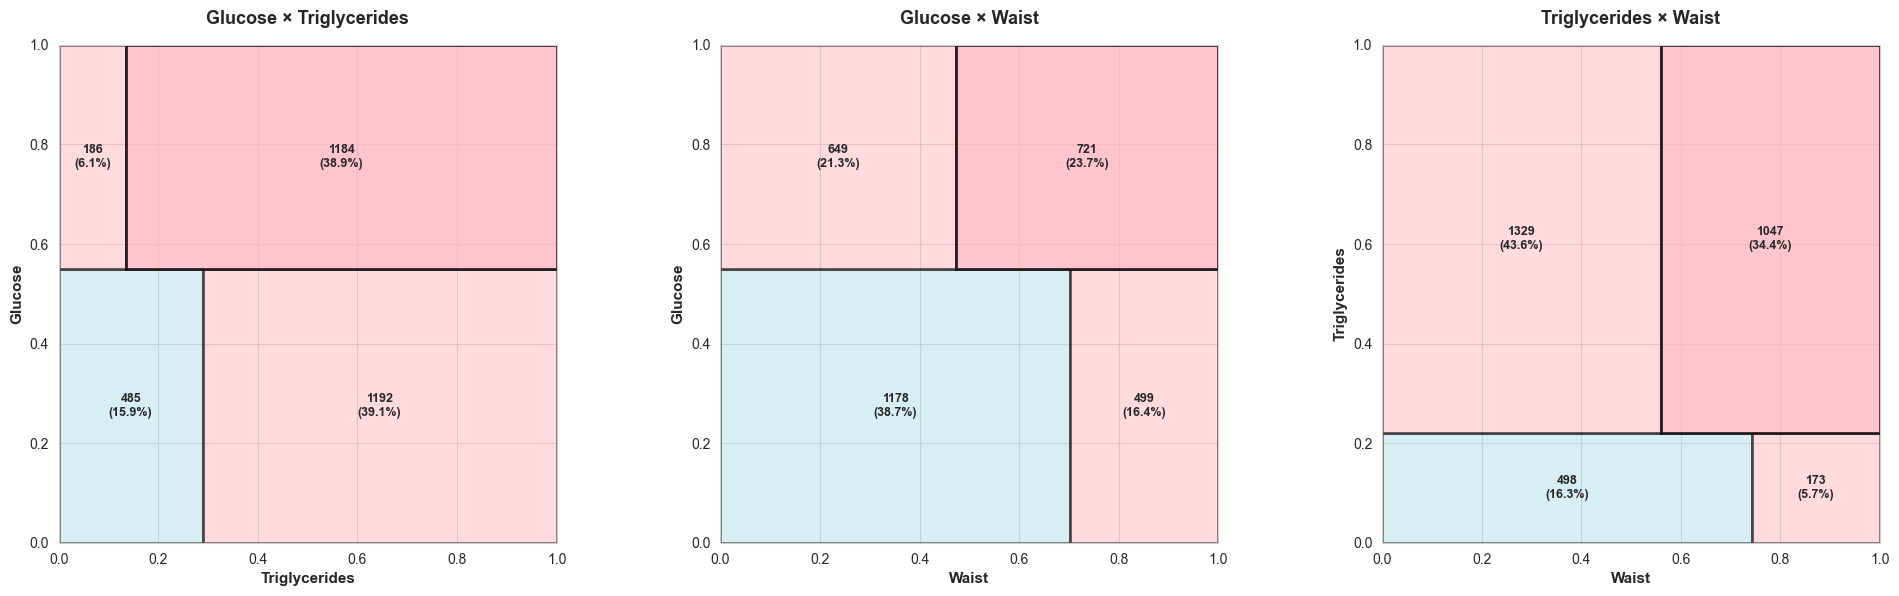

In [9]:
# Mosaic plots for 2-way combinations
from pathlib import Path
current = Path.cwd()

if 'notebooks' in str(current):
    if 'explore_data' in str(current):
        save_path = '../../results/figures/mosaic_2way_combinations.png'
    else:
        save_path = '../results/figures/mosaic_2way_combinations.png'
else:
    save_path = 'results/figures/mosaic_2way_combinations.png'

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Pastel colors for mosaic
colors_normal = '#B0E0E6'  # Light blue
colors_elevated = '#FFB6C1'  # Light pink

# Helper function to create mosaic plot
def create_mosaic(ax, row_var, col_var, row_label, col_label, title):
    """Create a simple mosaic plot"""
    ct = pd.crosstab(df[row_var], df[col_var])
    ct_norm = ct.div(ct.sum(axis=1), axis=0)
    
    # Get proportions
    row_totals = df[row_var].value_counts(normalize=True).sort_index()
    
    # Plot rectangles
    y_start = 0
    for i, (row_idx, row) in enumerate(ct_norm.iterrows()):
        row_height = row_totals[row_idx]
        x_start = 0
        
        for j, (col_idx, width) in enumerate(row.items()):
            color = colors_elevated if (i==1 or j==1) else colors_normal
            alpha = 0.8 if i==1 and j==1 else 0.5
            
            ax.add_patch(plt.Rectangle((x_start, y_start), width, row_height,
                                      facecolor=color, edgecolor='black', 
                                      linewidth=2, alpha=alpha))
            
            # Add count labels
            count = ct.loc[row_idx, col_idx]
            pct = count / len(df) * 100
            if width > 0.1 and row_height > 0.1:
                ax.text(x_start + width/2, y_start + row_height/2,
                       f'{count}\n({pct:.1f}%)',
                       ha='center', va='center', fontsize=9, fontweight='bold')
            
            x_start += width
        
        y_start += row_height
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel(col_label, fontsize=11, fontweight='bold')
    ax.set_ylabel(row_label, fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=13, fontweight='bold', pad=15)
    ax.set_aspect('equal')

# Create three mosaic plots
create_mosaic(axes[0], 'glucose_status', 'trig_status', 
              'Glucose', 'Triglycerides', 'Glucose × Triglycerides')
create_mosaic(axes[1], 'glucose_status', 'waist_status', 
              'Glucose', 'Waist', 'Glucose × Waist')
create_mosaic(axes[2], 'trig_status', 'waist_status', 
              'Triglycerides', 'Waist', 'Triglycerides × Waist')

plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

Saved: ../../results/figures/all_combinations_frequency.png


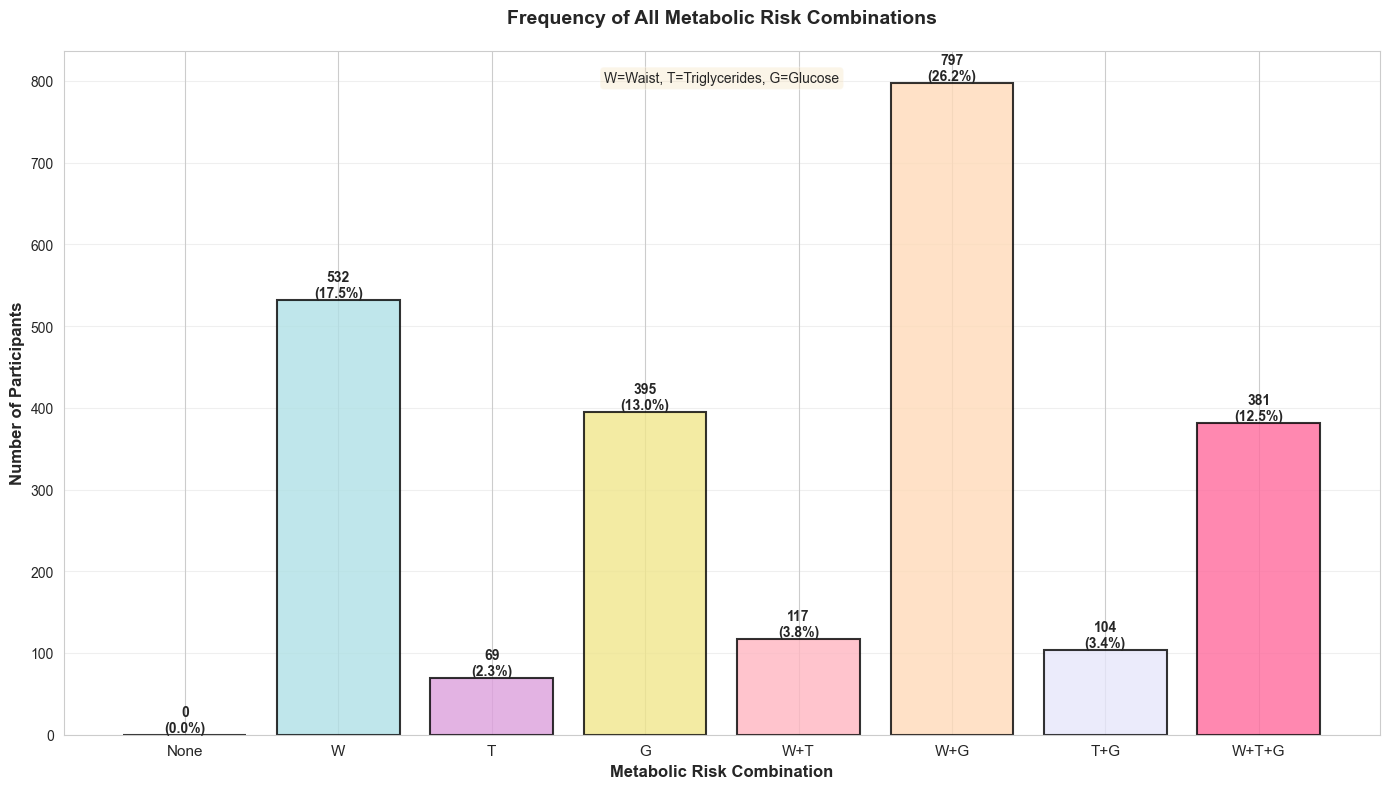

In [10]:
# Bar chart showing all 8 combinations
from pathlib import Path
current = Path.cwd()

if 'notebooks' in str(current):
    if 'explore_data' in str(current):
        save_path = '../../results/figures/all_combinations_frequency.png'
    else:
        save_path = '../results/figures/all_combinations_frequency.png'
else:
    save_path = 'results/figures/all_combinations_frequency.png'

fig, ax = plt.subplots(figsize=(14, 8))

# Prepare data
combo_counts = df['mets_combination'].value_counts()
combo_order = ['None', 'W', 'T', 'G', 'W+T', 'W+G', 'T+G', 'W+T+G']
combo_counts = combo_counts.reindex(combo_order, fill_value=0)

# Color coding: darker colors for more risk factors
colors_map = {
    'None': '#98FB98',      # Light green
    'W': '#B0E0E6',         # Light blue
    'T': '#DDA0DD',         # Light purple
    'G': '#F0E68C',         # Light yellow
    'W+T': '#FFB6C1',       # Light pink
    'W+G': '#FFDAB9',       # Peach
    'T+G': '#E6E6FA',       # Lavender
    'W+T+G': '#FF6B9D'      # Dark pink
}
colors = [colors_map[c] for c in combo_order]

# Create bars
bars = ax.bar(range(len(combo_counts)), combo_counts.values, 
              color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, combo_counts.values)):
    height = bar.get_height()
    pct = count / len(df) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{count:,}\n({pct:.1f}%)',
           ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
ax.set_xticks(range(len(combo_order)))
ax.set_xticklabels(combo_order, fontsize=11)
ax.set_xlabel('Metabolic Risk Combination', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Participants', fontsize=12, fontweight='bold')
ax.set_title('Frequency of All Metabolic Risk Combinations', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Add legend for abbreviations
legend_text = "W=Waist, T=Triglycerides, G=Glucose"
ax.text(0.5, 0.97, legend_text, transform=ax.transAxes,
        ha='center', va='top', fontsize=10, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

Saved: ../../results/figures/observed_vs_expected_heatmap.png


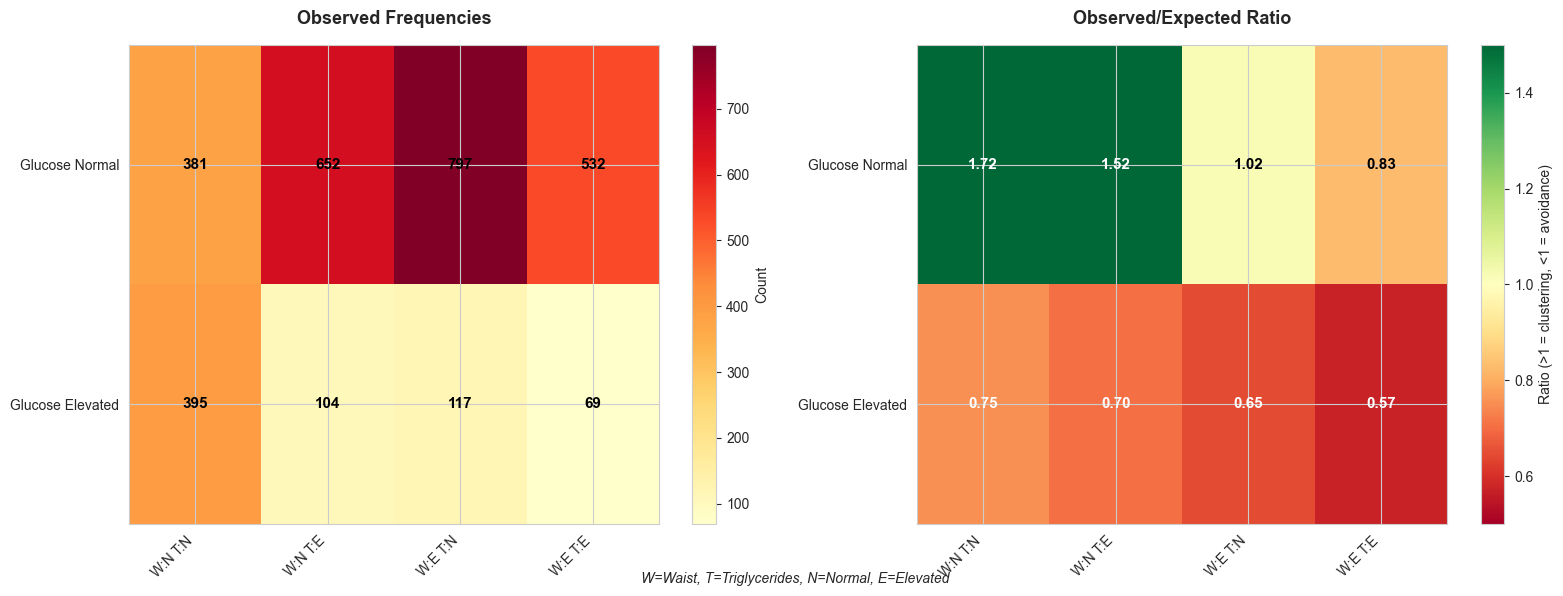

In [11]:
# Heatmap comparing observed vs expected frequencies
from pathlib import Path
current = Path.cwd()

if 'notebooks' in str(current):
    if 'explore_data' in str(current):
        save_path = '../../results/figures/observed_vs_expected_heatmap.png'
    else:
        save_path = '../results/figures/observed_vs_expected_heatmap.png'
else:
    save_path = 'results/figures/observed_vs_expected_heatmap.png'

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Prepare data for heatmap
obs_exp_pivot = exp_obs_df.copy()
obs_exp_pivot['Label'] = (obs_exp_pivot['Glucose'].str[0] + 
                          obs_exp_pivot['Triglycerides'].str[0] + 
                          obs_exp_pivot['Waist'].str[0])

# Observed counts
obs_matrix = obs_exp_pivot[['Label', 'Observed']].set_index('Label')
obs_matrix = obs_matrix.values.reshape(2, 4)

# Observed/Expected ratio
ratio_matrix = obs_exp_pivot[['Label', 'Obs/Exp_Ratio']].set_index('Label')
ratio_matrix = ratio_matrix.values.reshape(2, 4)

# Labels
row_labels = ['Glucose Normal', 'Glucose Elevated']
col_labels = ['W:N T:N', 'W:N T:E', 'W:E T:N', 'W:E T:E']

# Plot 1: Observed counts
im1 = axes[0].imshow(obs_matrix, cmap='YlOrRd', aspect='auto')
axes[0].set_xticks(range(4))
axes[0].set_yticks(range(2))
axes[0].set_xticklabels(col_labels, rotation=45, ha='right')
axes[0].set_yticklabels(row_labels)
axes[0].set_title('Observed Frequencies', fontsize=13, fontweight='bold', pad=15)

# Add text annotations
for i in range(2):
    for j in range(4):
        text = axes[0].text(j, i, f'{int(obs_matrix[i, j]):,}',
                           ha='center', va='center', color='black', fontsize=11, fontweight='bold')

plt.colorbar(im1, ax=axes[0], label='Count')

# Plot 2: Obs/Exp Ratio
im2 = axes[1].imshow(ratio_matrix, cmap='RdYlGn', aspect='auto', vmin=0.5, vmax=1.5)
axes[1].set_xticks(range(4))
axes[1].set_yticks(range(2))
axes[1].set_xticklabels(col_labels, rotation=45, ha='right')
axes[1].set_yticklabels(row_labels)
axes[1].set_title('Observed/Expected Ratio', fontsize=13, fontweight='bold', pad=15)

# Add text annotations
for i in range(2):
    for j in range(4):
        color = 'white' if ratio_matrix[i, j] < 0.8 or ratio_matrix[i, j] > 1.2 else 'black'
        text = axes[1].text(j, i, f'{ratio_matrix[i, j]:.2f}',
                           ha='center', va='center', color=color, fontsize=11, fontweight='bold')

plt.colorbar(im2, ax=axes[1], label='Ratio (>1 = clustering, <1 = avoidance)')

# Add note
fig.text(0.5, 0.02, 'W=Waist, T=Triglycerides, N=Normal, E=Elevated', 
         ha='center', fontsize=10, style='italic')

plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

Saved: ../../results/figures/phenotype_distribution_pie.png


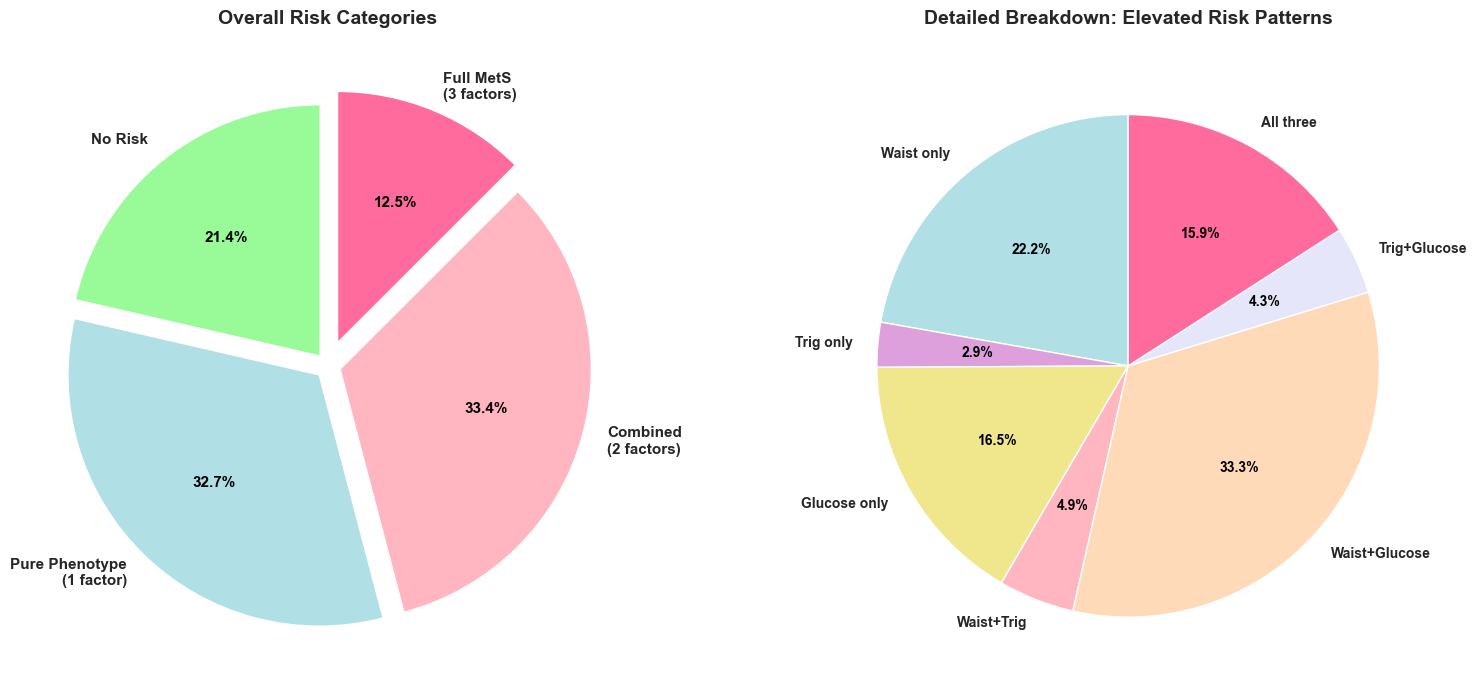

In [12]:
# Pie chart showing pure vs combined phenotypes
from pathlib import Path
current = Path.cwd()

if 'notebooks' in str(current):
    if 'explore_data' in str(current):
        save_path = '../../results/figures/phenotype_distribution_pie.png'
    else:
        save_path = '../results/figures/phenotype_distribution_pie.png'
else:
    save_path = 'results/figures/phenotype_distribution_pie.png'

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Pie 1: Overall categories
categories = ['No Risk', 'Pure Phenotype\n(1 factor)', 
              'Combined\n(2 factors)', 'Full MetS\n(3 factors)']
sizes = [patterns['None'], pure_total, patterns['Combined_2_factors'], patterns['Combined_All_3']]
colors_pie1 = ['#98FB98', '#B0E0E6', '#FFB6C1', '#FF6B9D']
explode = (0.05, 0.05, 0.05, 0.1)

wedges1, texts1, autotexts1 = axes[0].pie(sizes, labels=categories, autopct='%1.1f%%',
                                           colors=colors_pie1, explode=explode,
                                           startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[0].set_title('Overall Risk Categories', fontsize=14, fontweight='bold', pad=20)

# Make percentage text more visible
for autotext in autotexts1:
    autotext.set_color('black')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Pie 2: Detailed breakdown of elevated cases only
elevated_only = df[df['mets_score'] > 0]
detailed_labels = ['Waist only', 'Trig only', 'Glucose only',
                   'Waist+Trig', 'Waist+Glucose', 'Trig+Glucose',
                   'All three']
detailed_sizes = [
    patterns['Pure_Waist'],
    patterns['Pure_Triglycerides'],
    patterns['Pure_Glucose'],
    wt, wg, tg,
    patterns['Combined_All_3']
]
colors_pie2 = ['#B0E0E6', '#DDA0DD', '#F0E68C', '#FFB6C1', '#FFDAB9', '#E6E6FA', '#FF6B9D']

wedges2, texts2, autotexts2 = axes[1].pie(detailed_sizes, labels=detailed_labels, 
                                           autopct='%1.1f%%',
                                           colors=colors_pie2, startangle=90,
                                           textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1].set_title('Detailed Breakdown: Elevated Risk Patterns', fontsize=14, fontweight='bold', pad=20)

# Make percentage text more visible
for autotext in autotexts2:
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

Saved: ../../results/figures/venn_style_overlap.png


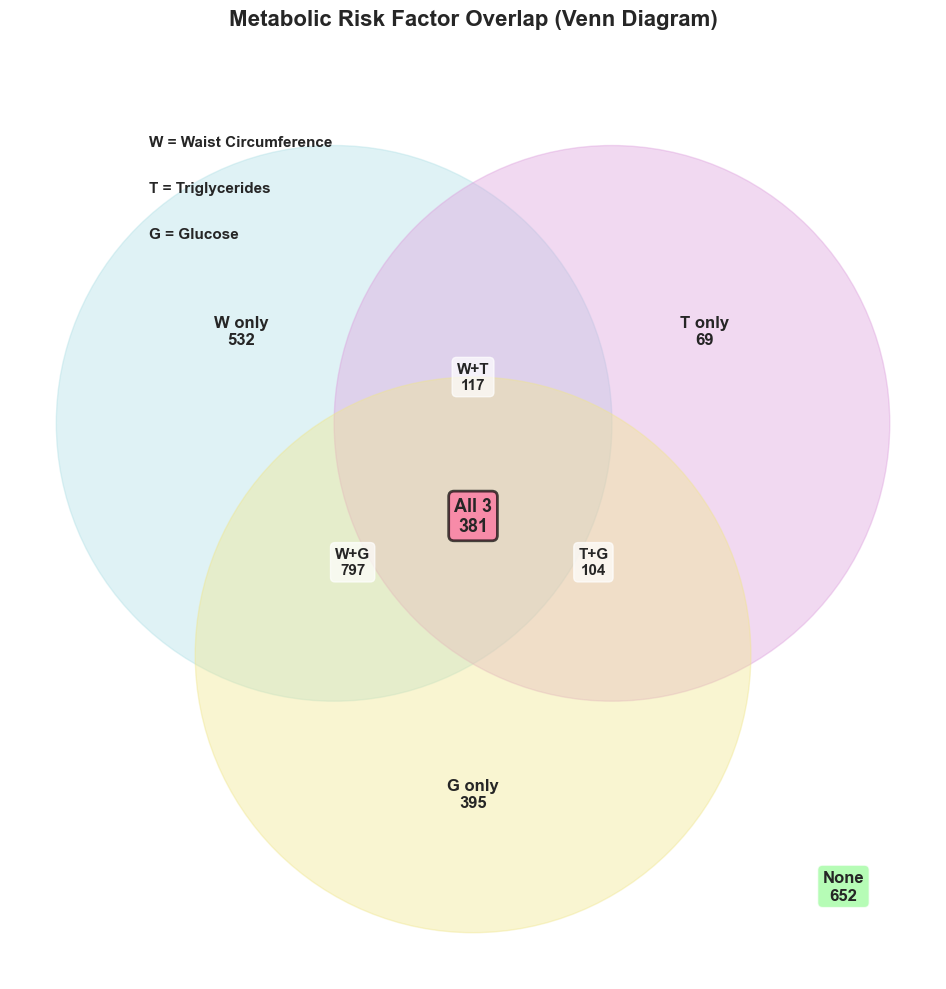

In [14]:
# Create a simple Venn-style visualization
from pathlib import Path
current = Path.cwd()

if 'notebooks' in str(current):
    if 'explore_data' in str(current):
        save_path = '../../results/figures/venn_style_overlap.png'
    else:
        save_path = '../results/figures/venn_style_overlap.png'
else:
    save_path = 'results/figures/venn_style_overlap.png'

fig, ax = plt.subplots(figsize=(12, 10))

# Draw three overlapping circles
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

# Circle positions (forming a Venn diagram)
circles = [
    Circle((0.35, 0.6), 0.3, color='#B0E0E6', alpha=0.4, label='Waist'),
    Circle((0.65, 0.6), 0.3, color='#DDA0DD', alpha=0.4, label='Triglycerides'),
    Circle((0.5, 0.35), 0.3, color='#F0E68C', alpha=0.4, label='Glucose')
]

for circle in circles:
    ax.add_patch(circle)

# Add counts in each region
# Pure regions
ax.text(0.25, 0.7, f'W only\n{patterns["Pure_Waist"]}', ha='center', va='center', 
        fontsize=12, fontweight='bold')
ax.text(0.75, 0.7, f'T only\n{patterns["Pure_Triglycerides"]}', ha='center', va='center',
        fontsize=12, fontweight='bold')
ax.text(0.5, 0.2, f'G only\n{patterns["Pure_Glucose"]}', ha='center', va='center',
        fontsize=12, fontweight='bold')

# Two-way overlaps
ax.text(0.5, 0.65, f'W+T\n{wt}', ha='center', va='center',
        fontsize=11, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
ax.text(0.37, 0.45, f'W+G\n{wg}', ha='center', va='center',
        fontsize=11, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
ax.text(0.63, 0.45, f'T+G\n{tg}', ha='center', va='center',
        fontsize=11, fontweight='bold', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Three-way overlap
ax.text(0.5, 0.5, f'All 3\n{patterns["Combined_All_3"]}', ha='center', va='center',
        fontsize=13, fontweight='bold', 
        bbox=dict(boxstyle='round', facecolor='#FF6B9D', alpha=0.7, edgecolor='black', linewidth=2))

# Add legend
ax.text(0.15, 0.9, 'W = Waist Circumference', fontsize=11, fontweight='bold')
ax.text(0.15, 0.85, 'T = Triglycerides', fontsize=11, fontweight='bold')
ax.text(0.15, 0.8, 'G = Glucose', fontsize=11, fontweight='bold')

# Outside all circles
ax.text(0.9, 0.1, f'None\n{patterns["None"]}', ha='center', va='center',
        fontsize=12, fontweight='bold', bbox=dict(boxstyle='round', facecolor='#98FB98', alpha=0.7))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Metabolic Risk Factor Overlap (Venn Diagram)', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved: {save_path}")
plt.show()

In [15]:
# Save all cross-tabulation tables
from pathlib import Path
current = Path.cwd()

if 'notebooks' in str(current):
    if 'explore_data' in str(current):
        table_path = '../../results/tables/'
    else:
        table_path = '../results/tables/'
else:
    table_path = 'results/tables/'

# Save 2-way cross-tabs
ct_gt.to_csv(table_path + 'crosstab_glucose_triglycerides.csv')
ct_gw.to_csv(table_path + 'crosstab_glucose_waist.csv')
ct_tw.to_csv(table_path + 'crosstab_triglycerides_waist.csv')

print(f"Saved: {table_path}crosstab_glucose_triglycerides.csv")
print(f"Saved: {table_path}crosstab_glucose_waist.csv")
print(f"Saved: {table_path}crosstab_triglycerides_waist.csv")

# Save 3-way cross-tab
ct_3way.to_csv(table_path + 'crosstab_3way_full.csv')
print(f"Saved: {table_path}crosstab_3way_full.csv")

# Save combination summary
combo_summary.to_csv(table_path + 'combination_summary_detailed.csv', index=False)
print(f"Saved: {table_path}combination_summary_detailed.csv")

# Save expected vs observed
exp_obs_df.to_csv(table_path + 'expected_vs_observed_frequencies.csv', index=False)
print(f"Saved: {table_path}expected_vs_observed_frequencies.csv")

# Save phenotype patterns
phenotype_summary = pd.DataFrame({
    'Category': ['No Risk', 'Pure Waist', 'Pure Triglycerides', 'Pure Glucose',
                 'Waist+Triglycerides', 'Waist+Glucose', 'Triglycerides+Glucose',
                 'All Three (Full MetS)'],
    'Count': [patterns['None'], patterns['Pure_Waist'], patterns['Pure_Triglycerides'],
              patterns['Pure_Glucose'], wt, wg, tg, patterns['Combined_All_3']],
    'Percentage': [
        patterns['None']/len(df)*100,
        patterns['Pure_Waist']/len(df)*100,
        patterns['Pure_Triglycerides']/len(df)*100,
        patterns['Pure_Glucose']/len(df)*100,
        wt/len(df)*100,
        wg/len(df)*100,
        tg/len(df)*100,
        patterns['Combined_All_3']/len(df)*100
    ]
})
phenotype_summary.to_csv(table_path + 'phenotype_patterns_summary.csv', index=False)
print(f"Saved: {table_path}phenotype_patterns_summary.csv")

print("\nAll cross-tabulation tables saved!")

Saved: ../../results/tables/crosstab_glucose_triglycerides.csv
Saved: ../../results/tables/crosstab_glucose_waist.csv
Saved: ../../results/tables/crosstab_triglycerides_waist.csv
Saved: ../../results/tables/crosstab_3way_full.csv
Saved: ../../results/tables/combination_summary_detailed.csv
Saved: ../../results/tables/expected_vs_observed_frequencies.csv
Saved: ../../results/tables/phenotype_patterns_summary.csv

All cross-tabulation tables saved!
